**Setup**

In [1]:
!pip install pandas scikit-learn openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.8/220.8 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


In [2]:
import pandas as pd
import openai
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

**Load the Dataset**

In [3]:
url = '/content/synthetic_document_dataset.csv'
data = pd.read_csv(url)

data.head()

,DocumentID,Category,Text
0,Document_1,Category_8,This is the content of Document_1
1,Document_2,Category_2,This is the content of Document_2
2,Document_3,Category_16,This is the content of Document_3
3,Document_4,Category_2,This is the content of Document_4
4,Document_5,Category_16,This is the content of Document_5


**Embedding the Documents**

In [5]:
!pip install --upgrade openai


In [9]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.6 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=226a922875f9a54e80c0c00f21731db2e377a3be71931aaa9dcf3928a13d1c99
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [10]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

def get_embedding(text):
    return model.encode(text)

sample_data = data.sample(n=1000)
sample_data['embedding'] = sample_data['Text'].apply(get_embedding)

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

**Clustering**

In [11]:
# Clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters)
sample_data['cluster'] = kmeans.fit_predict(list(sample_data['embedding']))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Visualizing the Clusters**

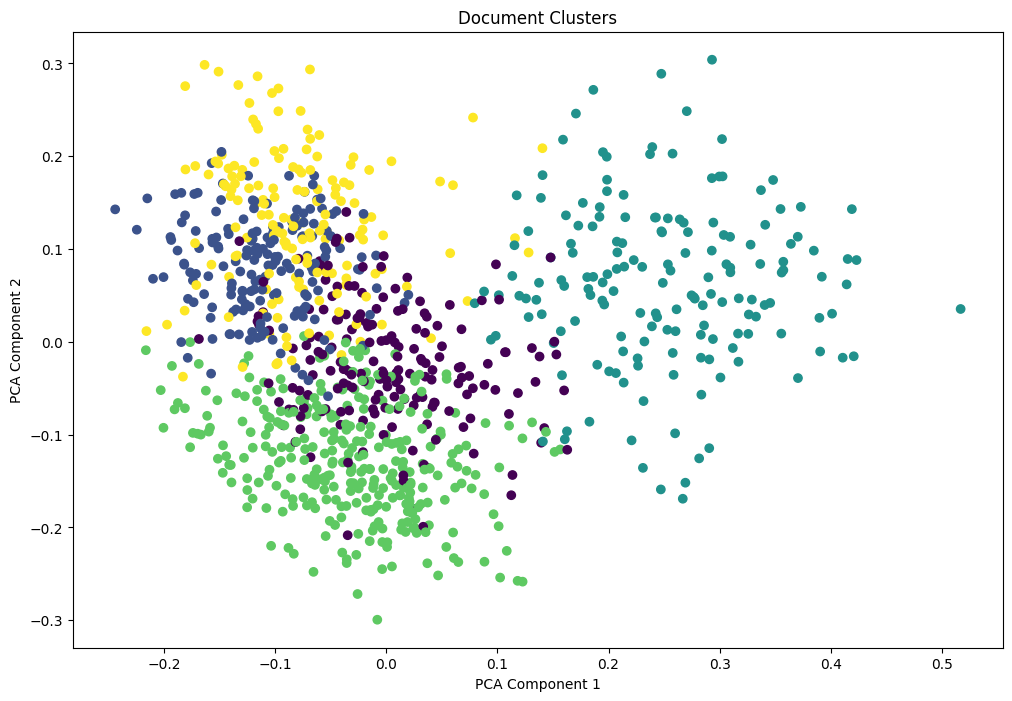

In [13]:
# Dimensionality Reduction
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(list(sample_data['embedding']))

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=sample_data['cluster'])
plt.title("Document Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


**Analysis and Conclusion**

In [14]:
for i in range(num_clusters):
    print(f"Cluster {i}:")
    print(sample_data[sample_data['cluster'] == i]['Text'].values)
    print("\n")


Cluster 0:
['This is the content of Document_10946'
 'This is the content of Document_2905'
 'This is the content of Document_4538'
 'This is the content of Document_3265'
 'This is the content of Document_10839'
 'This is the content of Document_15449'
 'This is the content of Document_3976'
 'This is the content of Document_5085'
 'This is the content of Document_3541'
 'This is the content of Document_2998'
 'This is the content of Document_2051'
 'This is the content of Document_4064'
 'This is the content of Document_2454'
 'This is the content of Document_303'
 'This is the content of Document_15432'
 'This is the content of Document_2331'
 'This is the content of Document_5237'
 'This is the content of Document_2613'
 'This is the content of Document_4231'
 'This is the content of Document_3644'
 'This is the content of Document_3959'
 'This is the content of Document_3496'
 'This is the content of Document_4637'
 'This is the content of Document_5292'
 'This is the content of D